In [8]:
import pandas as pd

# CSV 파일 읽기
data = pd.read_csv('쇼핑몰이탈_최종.csv', encoding='utf-8')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5379 entries, 0 to 5378
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   고객 ID    5379 non-null   int64 
 1   이탈 여부    5379 non-null   int64 
 2   가입 기간    5379 non-null   int64 
 3   접속 기기    5379 non-null   object
 4   도시 등급    5379 non-null   int64 
 5   배송거리     5379 non-null   int64 
 6   결제 방식    5379 non-null   object
 7   성별       5379 non-null   object
 8   앱 사용 시간  5379 non-null   int64 
 9   기기 수     5379 non-null   int64 
 10  주문 카테고리  5379 non-null   object
 11  만족도      5379 non-null   int64 
 12  결혼 여부    5379 non-null   object
 13  주소 수     5379 non-null   int64 
 14  불만족 여부   5379 non-null   int64 
 15  주문 증가율   5379 non-null   int64 
 16  쿠폰 수     5379 non-null   int64 
 17  주문 횟수    5379 non-null   int64 
 18  경과일      5379 non-null   int64 
 19  캐시백 금액   5379 non-null   int64 
dtypes: int64(15), object(5)
memory usage: 840.6+ KB


In [9]:
# 데이터프레임의 컬럼명 출력
print("데이터프레임의 컬럼명:")
print(data.columns)


데이터프레임의 컬럼명:
Index(['고객 ID', '이탈 여부', '가입 기간', '접속 기기', '도시 등급', '배송거리', '결제 방식', '성별',
       '앱 사용 시간', '기기 수', '주문 카테고리', '만족도', '결혼 여부', '주소 수', '불만족 여부',
       '주문 증가율', '쿠폰 수', '주문 횟수', '경과일', '캐시백 금액'],
      dtype='object')


In [10]:
#CityTier를 ordinal 범주형으로 변환
data['도시 등급'] = data['도시 등급'].astype('category')
print("\n도시 등급 데이터 타입 변환 후:")
print(data['도시 등급'].dtype)


도시 등급 데이터 타입 변환 후:
category


In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 데이터 복사 (SettingWithCopyWarning 방지)
numeric_data = data.copy()

# 수치형 데이터 열 선택
numeric_columns = [
    '고객 ID', '이탈 여부', '가입 기간', '배송거리', '앱 사용 시간',
    '기기 수', '만족도', '주소 수',
    '불만족 여부', '주문 증가율', '쿠폰 수', '주문 횟수',
    '경과일', '캐시백 금액'
]
numeric_data = numeric_data[numeric_columns]

# 결측값 처리 (열별 평균값으로 대체)
numeric_data.fillna(numeric_data.mean(), inplace=True)

# 데이터 표준화
scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(numeric_data)

# PCA 수행
pca = PCA()
pca_result = pca.fit_transform(scaled_numeric_data)

# 차원 축소: PC1 ~ PC2 (2D 시각화용)
reduced_data_2d = pca_result[:, :2]  # PC1과 PC2 선택

# 차원 축소: PC1 ~ PC5 (효율적 데이터 분석용)
reduced_data_5d = pca_result[:, :5]  # PC1 ~ PC5 선택

# 차원 축소: PC1 ~ PC10 (세부적인 분석용)
reduced_data_10d = pca_result[:, :10]  # PC1 ~ PC10 선택

# PCA 분산 설명 비율 계산
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# PCA 결과 요약
pca_summary = pd.DataFrame({
    '주성분': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    '분산 설명 비율': explained_variance_ratio,
    '누적 분산 설명 비율': cumulative_variance_ratio
})

# 결과 출력
print("PCA 결과 요약:")
print(pca_summary)

print("\n2D 차원 축소 데이터 (PC1 ~ PC2):")
print(reduced_data_2d[:5])  # 처음 5개 데이터 출력

print("\n5D 차원 축소 데이터 (PC1 ~ PC5):")
print(reduced_data_5d[:5])  # 처음 5개 데이터 출력

print("\n10D 차원 축소 데이터 (PC1 ~ PC10):")
print(reduced_data_10d[:5])  # 처음 5개 데이터 출력


PCA 결과 요약:
     주성분  분산 설명 비율  누적 분산 설명 비율
0    PC1  0.196807     0.196807
1    PC2  0.130558     0.327365
2    PC3  0.102647     0.430013
3    PC4  0.083385     0.513397
4    PC5  0.075588     0.588985
5    PC6  0.072006     0.660991
6    PC7  0.067613     0.728604
7    PC8  0.060402     0.789006
8    PC9  0.052096     0.841102
9   PC10  0.044831     0.885933
10  PC11  0.038983     0.924916
11  PC12  0.029145     0.954061
12  PC13  0.027546     0.981607
13  PC14  0.018393     1.000000

2D 차원 축소 데이터 (PC1 ~ PC2):
[[-1.64235417  0.20035842]
 [-2.53517736  1.2726956 ]
 [-2.63714045  0.64572231]
 [-2.34037539  0.72067211]
 [-2.81035003 -0.50047718]]

5D 차원 축소 데이터 (PC1 ~ PC5):
[[-1.64235417  0.20035842  0.73499698  2.69622971  0.44484069]
 [-2.53517736  1.2726956   0.76508625  2.21962333  0.29403382]
 [-2.63714045  0.64572231  1.50293448  2.32157393  0.97852674]
 [-2.34037539  0.72067211  0.6827563   1.38731872 -1.24300602]
 [-2.81035003 -0.50047718  1.84587079  1.20518283 -1.83819955]]

10

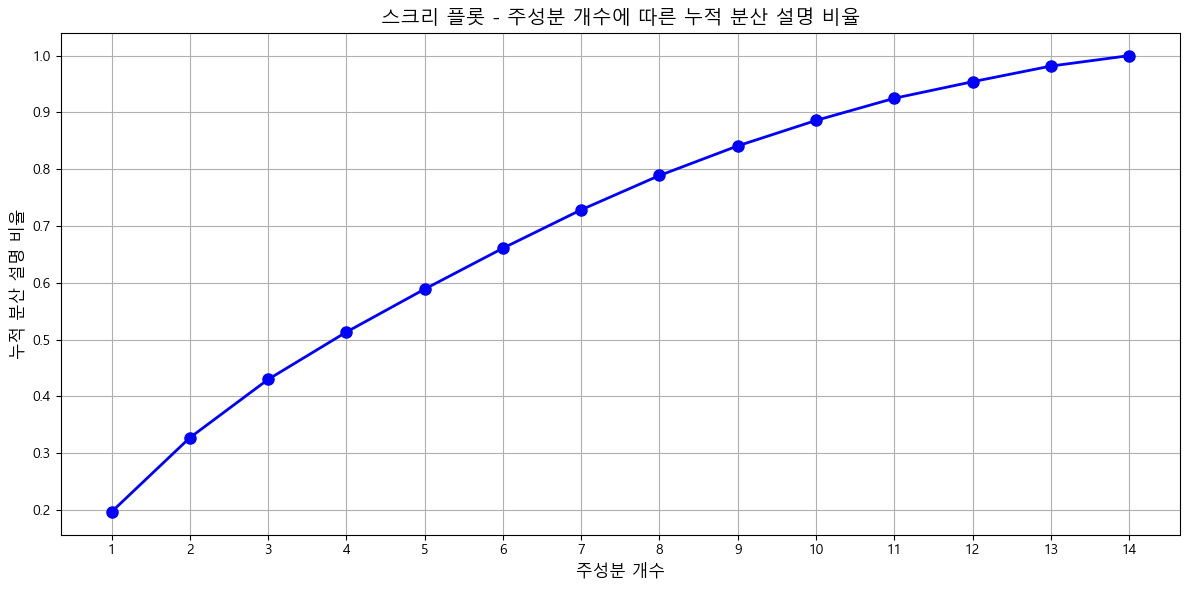

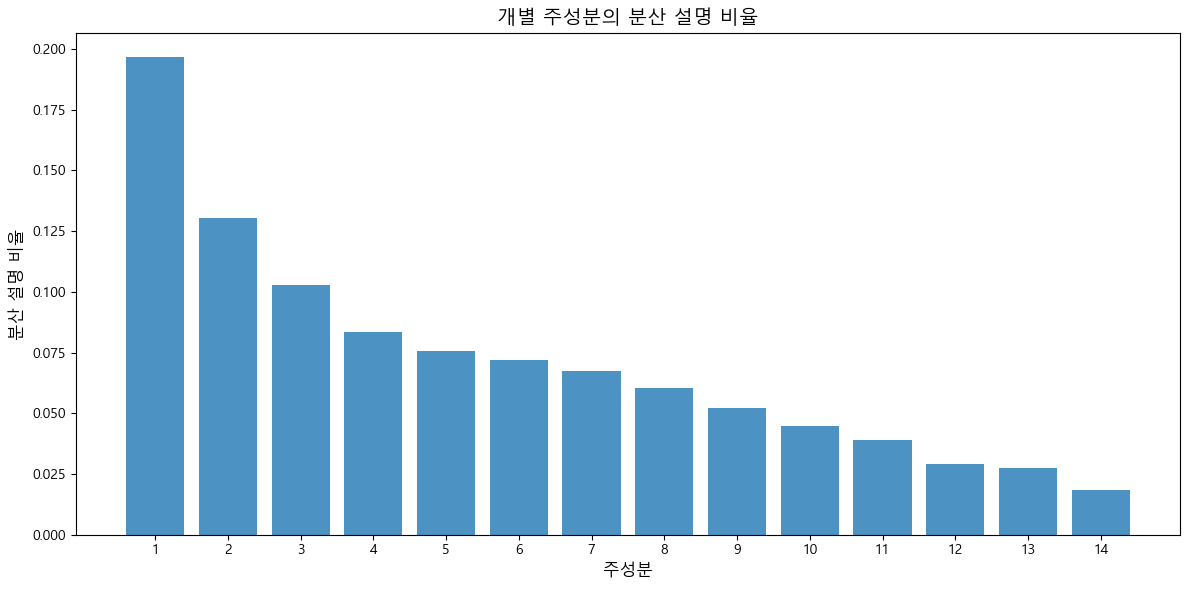

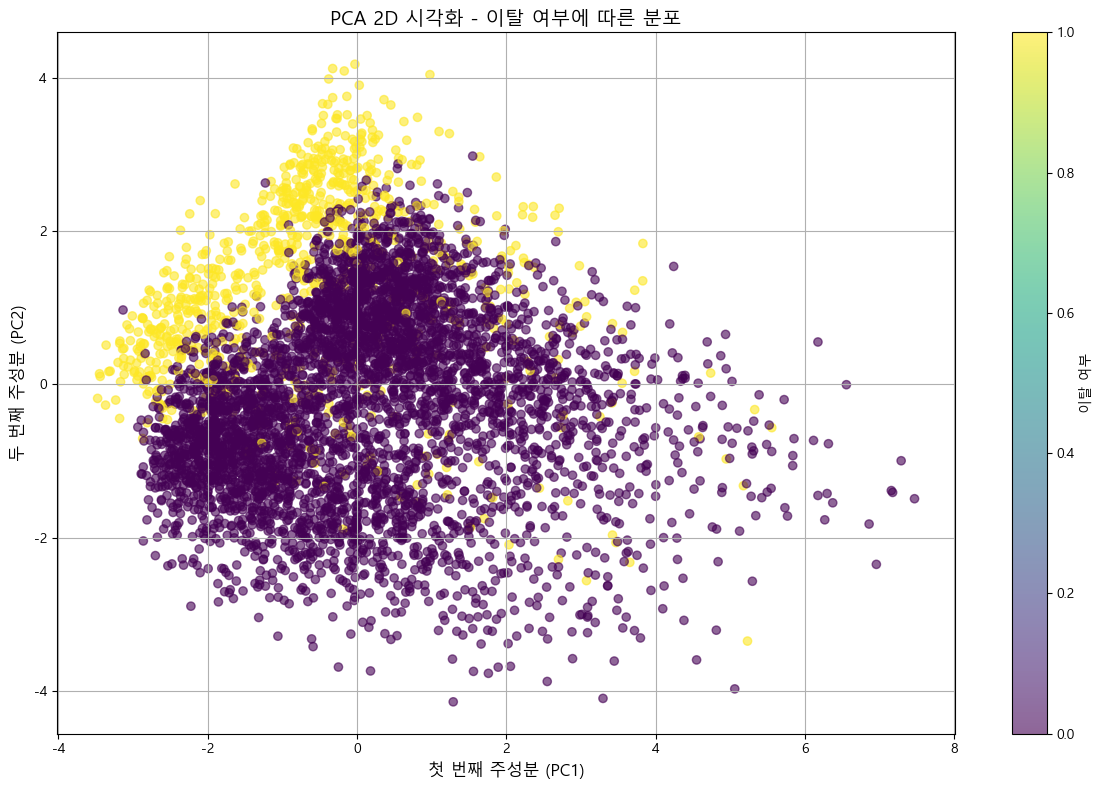

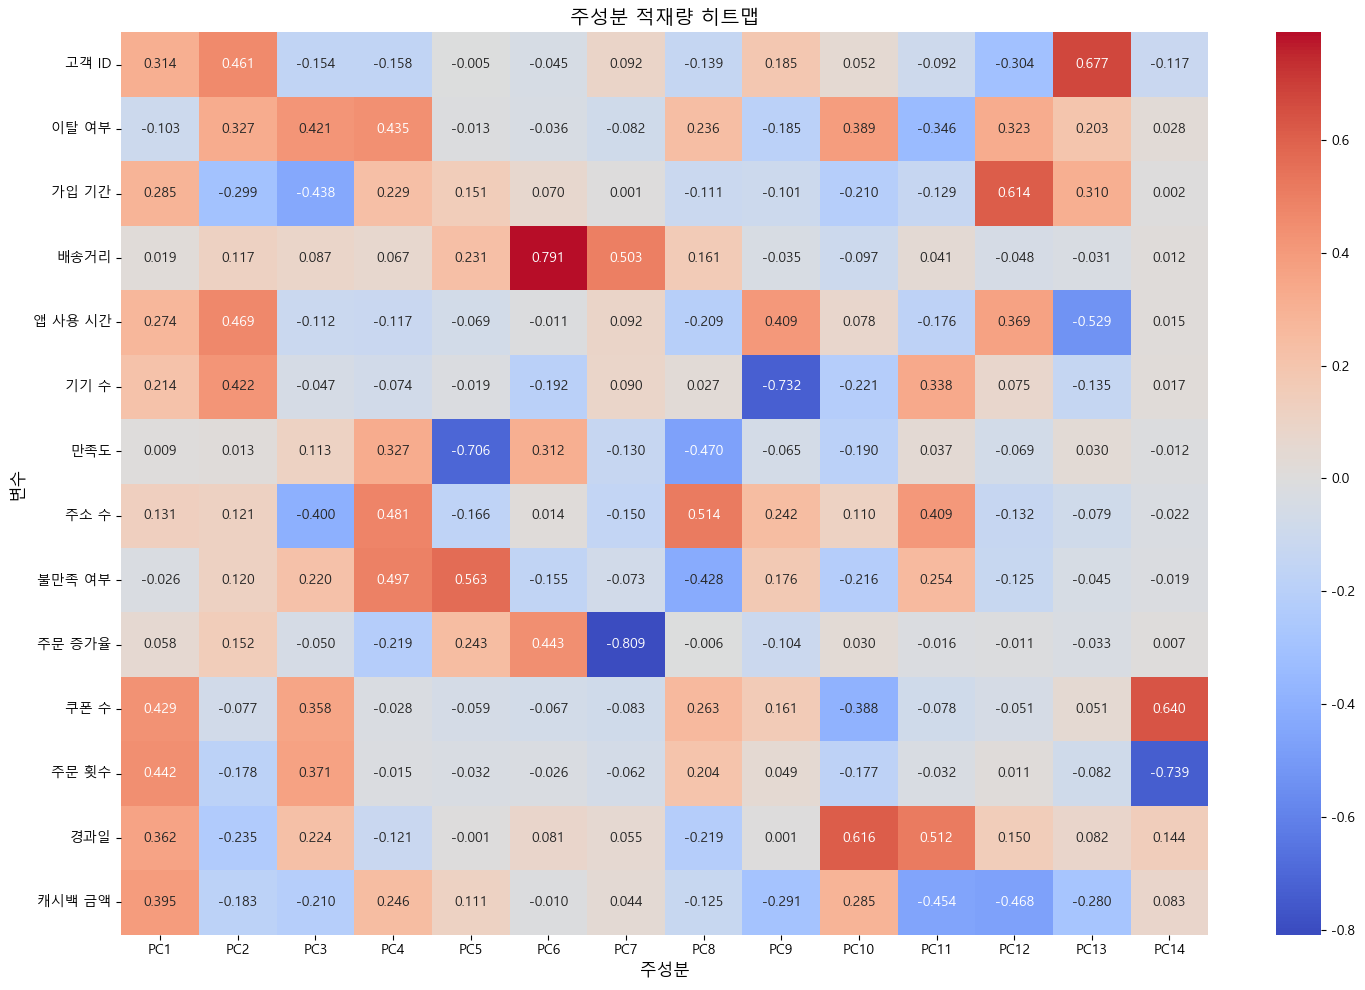

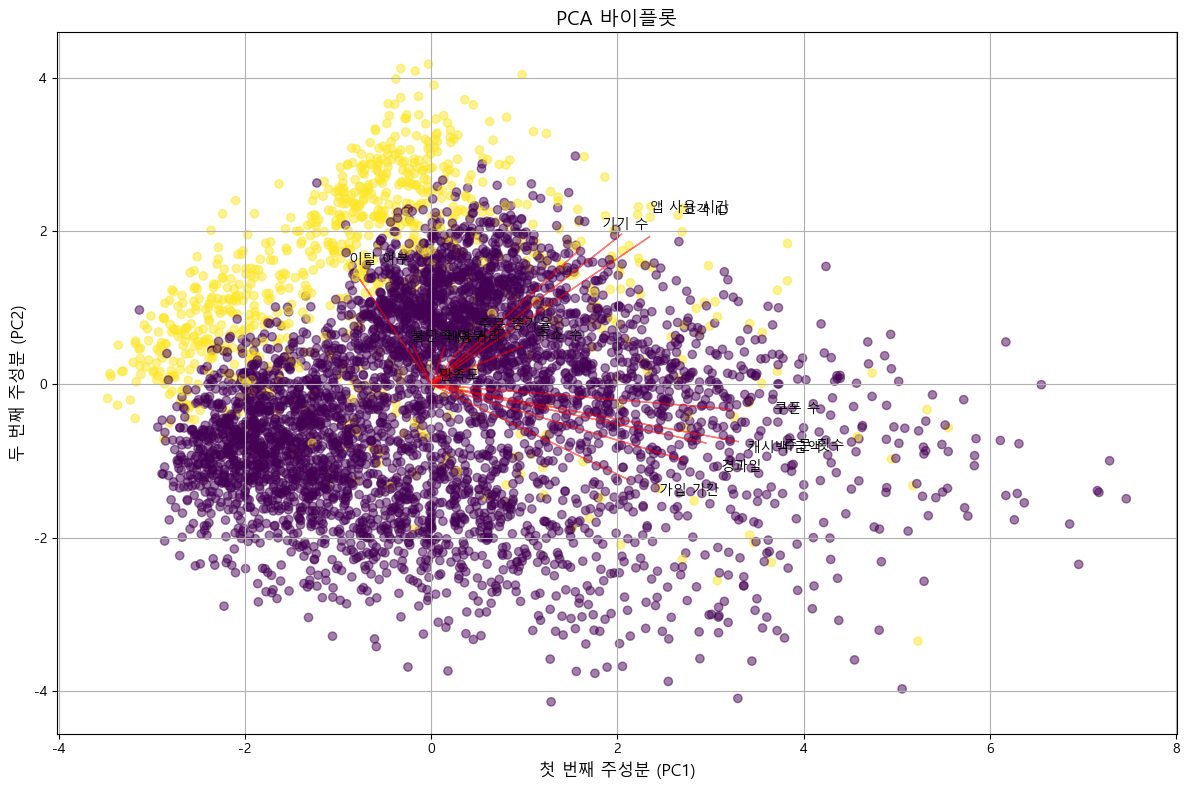


주요 변수 기여도 (절대값):
         고객 ID     이탈 여부     가입 기간      배송거리   앱 사용 시간      기기 수       만족도  \
PC1   0.314219  0.102532  0.285412  0.019295  0.273981  0.214207  0.009221   
PC2   0.461433  0.327120  0.298861  0.116989  0.469317  0.422035  0.013108   
PC3   0.153696  0.421467  0.438304  0.087073  0.111644  0.046689  0.113255   
PC4   0.157770  0.435388  0.229429  0.066509  0.116693  0.074216  0.327247   
PC5   0.005397  0.012947  0.151249  0.231225  0.068613  0.019228  0.705501   
PC6   0.045166  0.036050  0.069886  0.791070  0.010818  0.191867  0.311523   
PC7   0.091740  0.082369  0.000917  0.502921  0.091522  0.090266  0.130299   
PC8   0.139103  0.236242  0.111275  0.161045  0.209097  0.027046  0.469807   
PC9   0.185329  0.184661  0.100747  0.035326  0.409193  0.731508  0.065123   
PC10  0.051855  0.389396  0.209862  0.097283  0.078068  0.220673  0.189742   
PC11  0.091570  0.345518  0.128984  0.041217  0.176278  0.338059  0.037245   
PC12  0.304168  0.322841  0.614091  0.048143  

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


# 시각화 1: 스크리 플롯
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), 
         cumulative_variance_ratio, 'bo-', linewidth=2, markersize=8)
plt.xlabel('주성분 개수', fontsize=12)
plt.ylabel('누적 분산 설명 비율', fontsize=12)
plt.title('스크리 플롯 - 주성분 개수에 따른 누적 분산 설명 비율', fontsize=14)
plt.grid(True)
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.tight_layout()
plt.show()

# 시각화 2: 개별 주성분의 설명 비율
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), 
        explained_variance_ratio, alpha=0.8)
plt.xlabel('주성분', fontsize=12)
plt.ylabel('분산 설명 비율', fontsize=12)
plt.title('개별 주성분의 분산 설명 비율', fontsize=14)
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.tight_layout()
plt.show()

# 시각화 3: 2D 산점도
plt.figure(figsize=(12, 8))
scatter = plt.scatter(reduced_data_2d[:, 0], reduced_data_2d[:, 1], 
                     c=data['이탈 여부'], cmap='viridis', alpha=0.6)
plt.xlabel('첫 번째 주성분 (PC1)', fontsize=12)
plt.ylabel('두 번째 주성분 (PC2)', fontsize=12)
plt.title('PCA 2D 시각화 - 이탈 여부에 따른 분포', fontsize=14)
plt.colorbar(scatter, label='이탈 여부')
plt.grid(True)
plt.tight_layout()
plt.show()

# 시각화 4: 주성분 적재량 히트맵
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    index=numeric_columns
)

plt.figure(figsize=(15, 10))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0, fmt='.3f')
plt.title('주성분 적재량 히트맵', fontsize=14)
plt.xlabel('주성분', fontsize=12)
plt.ylabel('변수', fontsize=12)
plt.tight_layout()
plt.show()

# 시각화 5: 바이플롯
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]

    plt.figure(figsize=(12, 8))
    plt.scatter(xs, ys, c=data['이탈 여부'], cmap='viridis', alpha=0.5)
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*max(xs), coeff[i,1]*max(ys),
                 color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]*max(xs)*1.15, coeff[i,1]*max(ys)*1.15, 
                    "Var"+str(i+1))
        else:
            plt.text(coeff[i,0]*max(xs)*1.15, coeff[i,1]*max(ys)*1.15, 
                    labels[i])
            
    plt.xlabel('첫 번째 주성분 (PC1)', fontsize=12)
    plt.ylabel('두 번째 주성분 (PC2)', fontsize=12)
    plt.title('PCA 바이플롯', fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 바이플롯 생성
biplot(reduced_data_2d, np.transpose(pca.components_[0:2, :]), numeric_columns)

# 주성분 기여도 분석
contribution = pd.DataFrame(
    abs(pca.components_),
    columns=numeric_columns,
    index=[f'PC{i+1}' for i in range(len(explained_variance_ratio))]
)

print("\n주요 변수 기여도 (절대값):")
print(contribution)

1. 스크리 플롯 및 분산 설명 비율
스크리 플롯: 주성분의 개수에 따른 누적 분산 설명 비율이 나타나 있습니다.

첫 번째 주성분(PC1)과 두 번째 주성분(PC2)이 전체 데이터 변동의 대부분을 설명합니다.
그래프가 급격히 완만해지는 점은 적정 주성분 개수를 2~3개 정도로 선택할 것을 제안합니다.
개별 주성분의 분산 설명 비율:

첫 번째 주성분이 약 20%를 설명하며, 두 번째와 세 번째 주성분이 각각 약 15%와 13%로 감소합니다.
이후 주성분의 기여도는 완만하게 줄어듭니다.
2. PCA 2D 시각화
두 개의 주성분(PC1, PC2)으로 데이터를 시각화하였으며, 변수들 간 분포와 군집 형성이 관찰됩니다.
이탈 여부(색상으로 구분됨)가 주성분에 따라 어느 정도 차이를 보이는 것으로 나타납니다. 이를 통해, 이탈 여부를 분류하는 데 PCA 변환이 유용할 수 있습니다.
3. 적재량 히트맵
각 주성분이 변수들과 어떻게 연관되어 있는지를 나타냅니다. 적재량(loading)이 클수록 해당 주성분이 변수의 정보를 많이 포함하고 있음을 의미합니다.
PC1: 앱 사용 시간, 기기 수, 쿠폰 수 등의 변수가 높은 기여도를 보입니다.
PC2: 이탈 여부, 앱 사용 시간, 기기 수가 중요한 기여를 하고 있습니다.
이후 주성분들은 변수 간의 작은 패턴이나 잔여 정보를 설명합니다.
4. PCA 바이플롯
변수와 데이터 포인트의 상호작용을 시각화합니다.
데이터 포인트가 중심에서 멀리 있을수록 해당 주성분에서 큰 값을 가집니다.
변수 화살표는 주성분에 대한 기여도를 나타냅니다. 예를 들어, 배송거리와 불만족 여부는 특정 방향에서 강한 상관성을 보입니다.
결론 및 제안
주성분 선택: 첫 번째와 두 번째 주성분을 중심으로 데이터를 요약할 수 있습니다.
이탈 여부와 주요 변수:
앱 사용 시간, 기기 수, 불만족 여부가 이탈 여부를 설명하는 데 중요한 변수로 보입니다.
차원 축소 활용:
PCA로 데이터 차원을 축소하여 머신러닝 모델에 적용하거나 데이터 시각화에 사용할 수 있습니다.

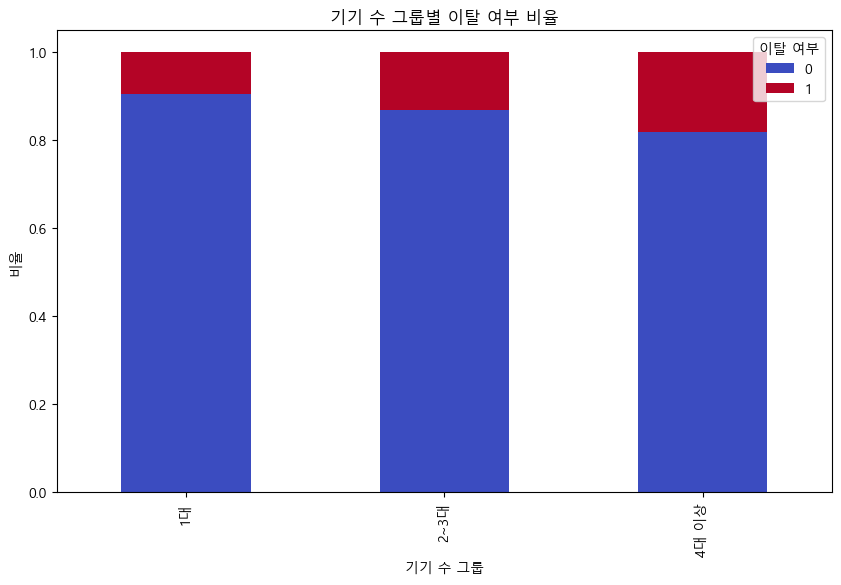

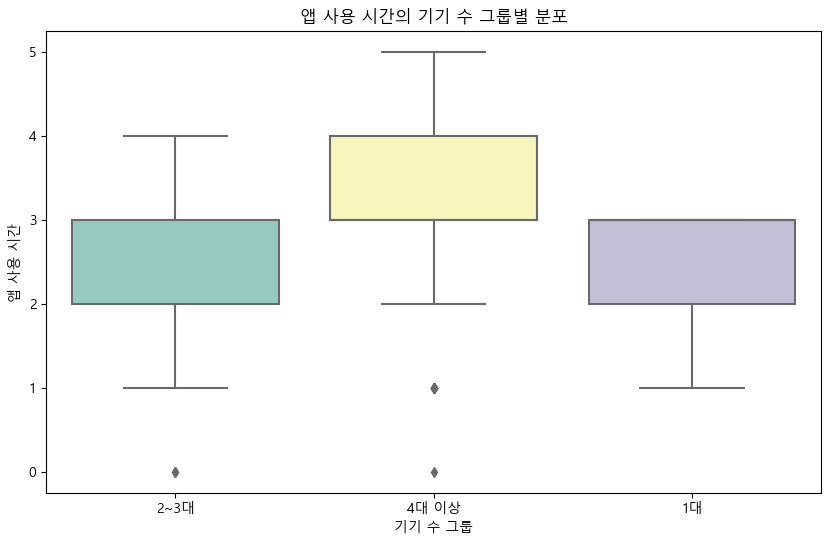

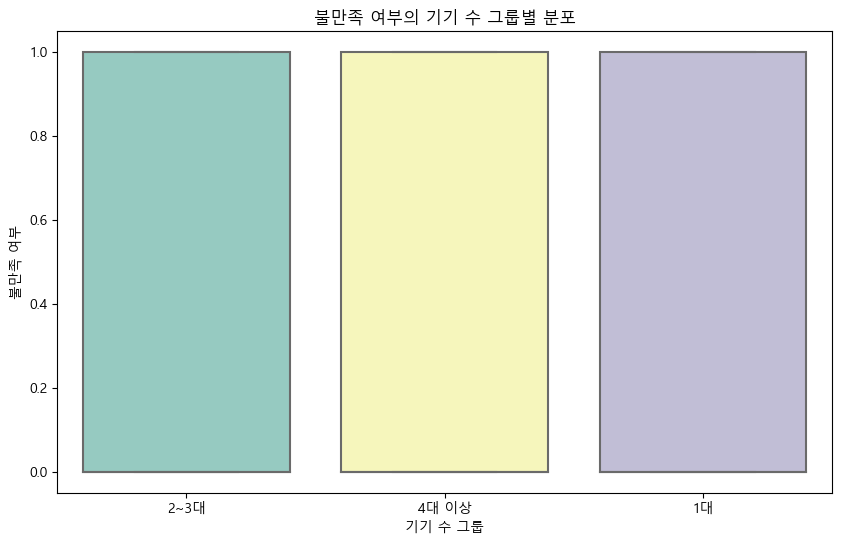

({'앱 사용 시간': {'F-stat': 623.7448588286961, 'p-value': 2.471689935380867e-244},
  '불만족 여부': {'F-stat': 0.022989016073180293, 'p-value': 0.9772733140834844}},
 {'앱 사용 시간': {'H-stat': 1032.128208116035, 'p-value': 7.519817474376401e-225},
  '불만족 여부': {'H-stat': 0.045994743702578604, 'p-value': 0.9772650521677889}},
 {'chi2': 28.863505560828067, 'p-value': 5.399697160152075e-07})

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, f_oneway, kruskal



# 1. 기기 수 그룹화
def group_device_count(count):
    if count == 1:
        return '1대'
    elif 2 <= count <= 3:
        return '2~3대'
    else:
        return '4대 이상'

data['기기 수 그룹'] = data['기기 수'].apply(group_device_count)

# 2. 기기 수 그룹별 이탈 여부 비율
grouped_data = data.groupby('기기 수 그룹')['이탈 여부'].value_counts(normalize=True).unstack()
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('기기 수 그룹별 이탈 여부 비율')
plt.xlabel('기기 수 그룹')
plt.ylabel('비율')
plt.legend(title='이탈 여부', loc='upper right')
plt.show()

# 3. 주요 변수 비교: 앱 사용 시간, 불만족 여부
key_variables = ['앱 사용 시간', '불만족 여부']
for var in key_variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='기기 수 그룹', y=var, data=data, palette='Set3')
    plt.title(f'{var}의 기기 수 그룹별 분포')
    plt.xlabel('기기 수 그룹')
    plt.ylabel(var)
    plt.show()

# 4. ANOVA(분산분석) 및 Kruskal-Wallis 검정
anova_results = {}
kruskal_results = {}
for var in key_variables:
    groups = [group[var].dropna() for _, group in data.groupby('기기 수 그룹')]
    f_stat, p_value_anova = f_oneway(*groups)
    h_stat, p_value_kruskal = kruskal(*groups)
    anova_results[var] = {'F-stat': f_stat, 'p-value': p_value_anova}
    kruskal_results[var] = {'H-stat': h_stat, 'p-value': p_value_kruskal}

# 5. 카이제곱 검정 (이탈 여부와 기기 수 그룹 간 관계)
contingency_table = pd.crosstab(data['기기 수 그룹'], data['이탈 여부'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# 결과 출력
anova_results, kruskal_results, {'chi2': chi2, 'p-value': p_value}


분석 결과 요약:
1. ANOVA(분산 분석) 결과
앱 사용 시간:
F-stat = 623.74, p-value ≈ 0
기기 수 그룹 간의 앱 사용 시간 차이가 통계적으로 매우 유의미합니다.
불만족 여부:
F-stat = 0.023, p-value ≈ 0.98
기기 수 그룹 간 불만족 여부의 평균 차이는 통계적으로 유의하지 않습니다.
2. Kruskal-Wallis 검정 결과
앱 사용 시간:
H-stat = 1032.13, p-value ≈ 0
기기 수 그룹 간의 앱 사용 시간 분포 차이가 통계적으로 매우 유의미합니다.
불만족 여부:
H-stat = 0.046, p-value ≈ 0.98
기기 수 그룹 간 불만족 여부 분포 차이는 통계적으로 유의하지 않습니다.
3. 카이제곱 검정 결과
기기 수 그룹과 이탈 여부 간 관계:
𝜒
2
=
28.86
χ 
2
 =28.86, p-value ≈ 0.000007
기기 수 그룹과 이탈 여부는 통계적으로 유의미한 관계가 있습니다.

해석 및 제안
앱 사용 시간:

기기 수가 많을수록 앱 사용 시간이 유의미하게 증가합니다.
앱 사용 시간이 높은 고객 그룹에 맞춤형 혜택이나 프로모션을 제공하여 이탈 가능성을 낮출 수 있습니다.
불만족 여부:

기기 수 그룹 간 불만족 여부에는 통계적으로 유의미한 차이가 없습니다.
이는 불만족 여부가 기기 수와 독립적으로 작용하고 있음을 시사합니다.
별도의 불만족 관리 전략을 통해 이탈률 감소를 도모해야 합니다.
이탈 여부:

기기 수 그룹과 이탈 여부 간의 유의미한 관계가 확인되었습니다.
특히 다중 기기를 사용하는 고객 그룹에서 이탈률이 높은지 추가 분석 및 원인 파악이 필요합니다.